In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras

/home/zafar/.pyenv/versions/2.7.13/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
def preprocess(images, normalization=255):
    dims = images.shape
    if len(dims) < 3:
        return images
    return images.reshape((dims[0], dims[1]*dims[2])).astype('float32') / normalization
train_images = preprocess(train_images)
test_images = preprocess(test_images)

In [5]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [6]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(keras.layers.Dense(10, activation='tanh'))

In [7]:
network.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [8]:
history = network.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0281 - acc: 0.9095 - val_loss: 0.0118 - val_acc: 0.9593
Epoch 2/20
48000/48000 [==============================] - 1s 16us/step - loss: 0.0098 - acc: 0.9677 - val_loss: 0.0086 - val_acc: 0.9690
Epoch 3/20
48000/48000 [==============================] - 1s 16us/step - loss: 0.0074 - acc: 0.9759 - val_loss: 0.0079 - val_acc: 0.9718
Epoch 4/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.0062 - acc: 0.9810 - val_loss: 0.0071 - val_acc: 0.9736
Epoch 5/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.0054 - acc: 0.9838 - val_loss: 0.0065 - val_acc: 0.9756
Epoch 6/20
48000/48000 [==============================] - 1s 16us/step - loss: 0.0048 - acc: 0.9859 - val_loss: 0.0064 - val_acc: 0.9762
Epoch 7/20
48000/48000 [==============================] - 1s 16us/step - loss: 0.0043 - acc: 0.9875 - val_loss: 0.0063 - val_acc

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print 'test_acc:', test_acc
print 'test_loss:', test_loss

10000/10000 [==============================] - 0s 20us/step
test_acc: 0.9768
test_loss: 0.005966137247346342


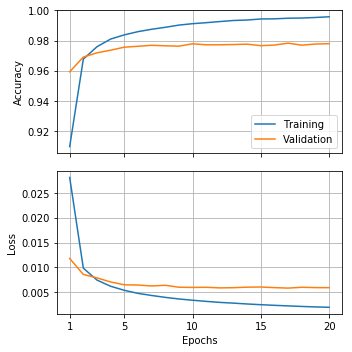

In [10]:
epochs = np.arange(1, 21)
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(2, sharex=True,figsize=(5,5))
ax[0].plot(epochs, acc, label="Training")
ax[0].plot(epochs, val_acc, label="Validation")
ax[0].set_ylabel('Accuracy')
ax[0].grid()
ax[0].legend()

ax[1].plot(epochs, loss, label="Training")
ax[1].plot(epochs, val_loss, label="Validation")
ax[1].set_ylabel('Loss')
ax[1].set_xticks([1, 5, 10, 15, 20])
ax[1].grid()
ax[1].set_xlabel("Epochs")

plt.tight_layout()

In [11]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


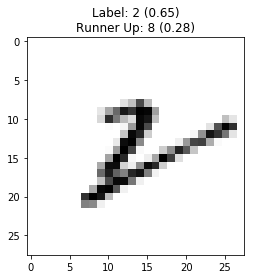

In [12]:
d_idx = np.random.randint(test_images.shape[0])
digit = test_images[d_idx]
label_probs = network.predict(np.array([digit]))
labels = np.argsort(label_probs)[0]
label = labels[-1]
confidence = label_probs[0][label]
plt.imshow(digit.reshape((28, 28)), cmap=plt.cm.binary)
plt.title("Label: {} ({:.2})\nRunner Up: {} ({:.2})".format(label, confidence, labels[-2], label_probs[0][labels[-2]]));

In [13]:
print np.maximum(3, -3)
print np.max((3, -3))

3
3
